# Classifying Mode for All Transpositions

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('../modules')
from music_project import Analyzer

## Clustering and Manifold Learning

### Load Data

In [15]:
csv_dir = '../csv/hymns_single-tone_alltranspositions_nosampling.csv'
df_nosamp = pd.read_csv(csv_dir, index_col=0)
X = df_nosamp[[str(n) for n in range(11)]]
y = df_nosamp['mode']
ana_nosamp = Analyzer(X, y)
ana_nosamp.train_test_split(test_size=0.2, random_state=42)
df_nosamp

,sig-mode,mode,sig,name,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,0,MajesticSweetnessSitsEnthroned_(nc)simms-jr.mid,0.401606,0.000000,0.056393,0.000000,0.156354,0.077541,0.000000,0.245839,0.000000,0.023497,0.000000,0.038770
1,1,1,0,MakeMeAChannelOfBlessing_(nc)simms-jr.mid,0.293248,0.000000,0.130001,0.000000,0.112117,0.152700,0.011005,0.183308,0.000000,0.055715,0.000000,0.061905
2,1,1,0,ManOfSorrows_(nc)simms-jr.mid,0.327632,0.000000,0.050256,0.000000,0.192911,0.068771,0.007935,0.184976,0.013225,0.100511,0.000000,0.053782
3,1,1,0,MayTheMindOfChristMySavior_(nc)simms-jr.mid,0.247073,0.000000,0.118267,0.000000,0.141816,0.124122,0.000000,0.243430,0.000000,0.072600,0.000000,0.052693
4,1,1,0,MomentByMoment_(nc)simms-jr.mid,0.302664,0.007206,0.116756,0.006551,0.104819,0.074829,0.015068,0.220338,0.007861,0.074174,0.015723,0.054011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,22,0,11,Havah_Nagilah_(nc)pope.mid,0.000000,0.118769,0.001231,0.326462,0.100308,0.004923,0.008615,0.052615,0.211692,0.014769,0.098462,0.062154
4340,23,1,11,America_the_Beautiful_(nc)pope.mid,0.008163,0.161224,0.000000,0.116327,0.075510,0.012245,0.220408,0.000000,0.073469,0.008163,0.095918,0.228571
4341,23,1,11,Battle_Hymn_of_the_Republic_(nc)pope.mid,0.000000,0.035992,0.000000,0.185798,0.090467,0.000000,0.214981,0.000000,0.042802,0.000000,0.016537,0.413424
4342,23,1,11,My_Country_Tis_of_Thee_(nc)pope.mid,0.000000,0.101852,0.000000,0.160494,0.095679,0.000000,0.299383,0.000000,0.049383,0.000000,0.043210,0.250000


### K-means Clustering

In [16]:
ana_nosamp.fit_kmeans(name='kmeans', random_state=42)

Best clustering: KMeans(n_clusters=2, n_init=1, random_state=42)
Info score for cluster: -0.00024291418378763507


### Gaussian Mixture Model

In [17]:
ana_nosamp.fit_gmm(name='gmm', random_state=42)

Best clustering: GaussianMixture(init_params='k-means++', n_components=2, random_state=42)
Info score for cluster: 0.00771766064549313


### DBSCAN

In [18]:
eps_vals = np.linspace(0.01,0.2,20)
min_samples_vals = list(range(1,20))
ana_nosamp.fit_dbscan(name='dbscan', eps_vals=eps_vals, min_samples_vals=min_samples_vals, random_state=42)

Best clustering: DBSCAN(eps=0.12, min_samples=18, n_jobs=-1)
Info score for cluster: 0.5520763098455943
Best eps: 0.12
Best min_samples: 18


### t-SNE

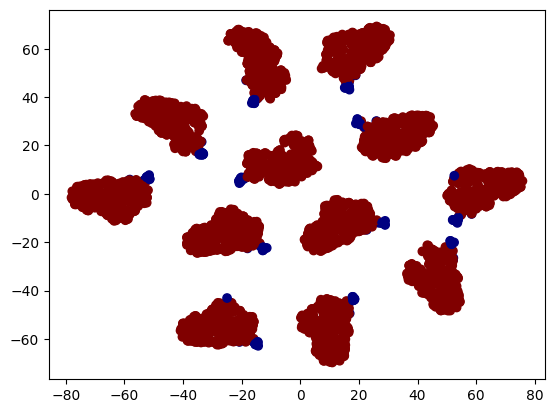

In [19]:
ana_nosamp.fit_tsne(name='tsne', random_state=42)
fig, ax = ana_nosamp.plot_embedding('tsne')
plt.show()

### Save Unsampled Analyzer

In [20]:
print(ana_nosamp)

Models:


Clusters:
kmeans: KMeans(n_clusters=2, n_init=1, random_state=42)
gmm: GaussianMixture(init_params='k-means++', n_components=2, random_state=42)
dbscan: DBSCAN(eps=0.12, min_samples=18, n_jobs=-1)


Embeddings:
tsne: TSNE(random_state=42)



In [21]:
save_dir = '../models/part_1_hymns/'
with open(save_dir + 'analyzer_mode_alltrans_nosamp.pkl', 'wb') as f:
    pickle.dump(ana_nosamp, f)

## Classification

### Load Data

In [2]:
csv_dir = '../csv/hymns_single-tone_alltranspositions_minor-upsampled.csv'
df_samp = pd.read_csv(csv_dir, index_col=0)
X = df_samp[[str(n) for n in range(11)]]
y = df_samp['mode']
ana_samp = Analyzer(X, y)
ana_samp.train_test_split(test_size=0.2, random_state=42)
df_samp

,sig-mode,mode,sig,name,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,0,MajesticSweetnessSitsEnthroned_(nc)simms-jr.mid,0.401606,0.000000,0.056393,0.000000,0.156354,0.077541,0.000000,0.245839,0.000000,0.023497,0.000000,0.038770
1,1,1,0,MakeMeAChannelOfBlessing_(nc)simms-jr.mid,0.293248,0.000000,0.130001,0.000000,0.112117,0.152700,0.011005,0.183308,0.000000,0.055715,0.000000,0.061905
2,1,1,0,ManOfSorrows_(nc)simms-jr.mid,0.327632,0.000000,0.050256,0.000000,0.192911,0.068771,0.007935,0.184976,0.013225,0.100511,0.000000,0.053782
3,1,1,0,MayTheMindOfChristMySavior_(nc)simms-jr.mid,0.247073,0.000000,0.118267,0.000000,0.141816,0.124122,0.000000,0.243430,0.000000,0.072600,0.000000,0.052693
4,1,1,0,MomentByMoment_(nc)simms-jr.mid,0.302664,0.007206,0.116756,0.006551,0.104819,0.074829,0.015068,0.220338,0.007861,0.074174,0.015723,0.054011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,22,0,11,OSacredHeadNowWounded_(nc)simms-jr.mid,0.011403,0.101244,0.000000,0.161368,0.089841,0.008293,0.124050,0.016586,0.205943,0.002073,0.078093,0.201106
8348,22,0,11,OSacredHeadNowWounded_(nc)simms-jr.mid,0.011403,0.101244,0.000000,0.161368,0.089841,0.008293,0.124050,0.016586,0.205943,0.002073,0.078093,0.201106
8349,22,0,11,SalvationTune_(nc)simms-jr.mid,0.000000,0.091978,0.000000,0.273428,0.067104,0.003471,0.094389,0.003471,0.269668,0.000000,0.057462,0.139028
8350,22,0,11,ComeYeSinnersPoorAndNeedyA_(nc)simms-jr.mid,0.000000,0.032251,0.000000,0.214389,0.027290,0.000000,0.136758,0.020467,0.213976,0.000000,0.040314,0.314554


### Logistic Regression

In [8]:
params = {}
params['l1_ratio'] = np.linspace(0,1,6)
params['C'] = np.power(10, np.linspace(-5,5,21))
params['penalty'] = ['elasticnet']
params['solver'] = ['saga']
params['max_iter'] = [10000]
ana_samp.train_model_gscv(LogisticRegression, name='logreg', params=params, random_state=42)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Scores for 'logreg':
Training score: 0.5455770094297261
Test score: 0.5320167564332735
 
Best params:
{'C': 0.01, 'l1_ratio': 0.0, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'}
 


### Support Vector Classifier

#### Radial basis kernel

In [4]:
params = {}
params['C'] = np.power(10, np.linspace(-1, 3, 11))
params['kernel'] = ['rbf']
ana_samp.train_model_gscv(SVC, 'svc-rbf', params=params, random_state=42)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Scores for 'svc-rbf':
Training score: 1.0
Test score: 1.0
 
Best params:
{'C': 158.48931924611142, 'kernel': 'rbf'}
 


#### Polynomial kernels

In [3]:
for degree in range(1,6):
    params = {}
    params['C'] = np.power(10, np.linspace(-1, 3, 5))
    params['kernel'] = ['poly']
    params['coef0'] = [0, 1]
    params['degree'] = [degree]
    ana_samp.train_model_gscv(SVC, name=f'svc-poly-{degree}', params=params, random_state=42)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Scores for 'svc-poly-1':
Training score: 0.5086064960335279
Test score: 0.47097546379413524
 
Best params:
{'C': 1000.0, 'coef0': 1, 'degree': 1, 'kernel': 'poly'}
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Scores for 'svc-poly-2':
Training score: 0.8408920820236492
Test score: 0.8384201077199281
 
Best params:
{'C': 1000.0, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Scores for 'svc-poly-3':
Training score: 1.0
Test score: 0.997606223818073
 
Best params:
{'C': 100.0, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Scores for 'svc-poly-4':
Training score: 1.0
Test score: 0.9982046678635548
 
Best params:
{'C': 10.0, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
 
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Scores for 'svc-poly-5':
Training score: 1.0
Test score: 0.998204667

### Decision Tree

#### Pre-pruned (via GridSearchCV)

In [6]:
params = {}
params['criterion'] = ['gini', 'entropy', 'log_loss']
params ['max_depth'] = list(range(20,31))
params['min_samples_split'] = list(range(2,6))
params['min_samples_leaf'] = list(range(1,6))
ana_samp.train_model_gscv(DecisionTreeClassifier, name='dt-gscv', params=params, random_state=42)

Fitting 5 folds for each of 660 candidates, totalling 3300 fits
Scores for 'dt-gscv':
Training score: 1.0
Test score: 0.9934171154997008
 
Best params:
{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2}
 


#### Post-pruned (with cost-complexity)

In [7]:
ana_samp.train_tree_ccp(name='dt-ccp', val_size=0.2, random_state=42)

Scores for 'dt-ccp':
Training score: 1.0
Test score: 0.9934171154997008
 
ccp_alpha: 0.0
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
 


### Ensemble models

#### Random Forest

In [9]:
params = {}
params['n_estimators'] = [30, 100, 300]
params['max_features'] = ['sqrt', None]
ana_samp.train_model_gscv(RandomForestClassifier, name='rf', params=params, random_state=42)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Scores for 'rf':
Training score: 1.0
Test score: 0.9970077797725913
 
Best params:
{'max_features': 'sqrt', 'n_estimators': 100}
 


#### Gradient Boosting

In [10]:
params = {}
params['learning_rate'] = [0.03, 0.1, 0.3]
params['n_estimators'] = [30, 100, 300]
params['subsample'] = [0.5, 1]
params['max_features'] = ['sqrt', None]
ana_samp.train_model_gscv(GradientBoostingClassifier, name='gradboost', params=params, random_state=42)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Scores for 'gradboost':
Training score: 1.0
Test score: 0.997606223818073
 
Best params:
{'learning_rate': 0.3, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1}
 


### Projection

In [11]:
ana_samp.train_projection('proj')

Scores for 'proj':
Training score: 0.4842089507558749
Test score: 0.4578096947935368
 


### Save Sampled Analyzer

In [12]:
print(ana_samp)

Models:
svc-poly-1: GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0, 1], 'degree': [1], 'kernel': ['poly']},
             verbose=3)
svc-poly-2: GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0, 1], 'degree': [2], 'kernel': ['poly']},
             verbose=3)
svc-poly-3: GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0, 1], 'degree': [3], 'kernel': ['poly']},
             verbose=3)
svc-poly-4: GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0, 1], 'degree': [4], 'kernel': ['poly']},
             verbose

In [13]:
save_dir = '../models/part_1_hymns/'
with open(save_dir + 'analyzer_mode_alltrans_samp.pkl', 'wb') as f:
    pickle.dump(ana_samp, f)